## Installing Pints

### Importing required libraries & pints

In [ ]:
!pip install pints

In [13]:
import numpy as np
import pandas as pd
import h5py
import pints
import pints.toy
import pints.plot
import matplotlib.pyplot as plt


### Repressilator Model

In [14]:
#
# Repressilator toy model.
#
# This file is part of PINTS (https://github.com/pints-team/pints/) which is
# released under the BSD 3-clause license. See accompanying LICENSE.md for
# copyright notice and full license details.
#
#
import numpy as np
import pints
from scipy.integrate import odeint

from pints.toy import ToyModel




class RepressilatorModel(pints.ForwardModel, ToyModel):
    """
    The "Repressilator" model describes oscillations in a network of proteins
    that suppress their own creation [1]_, [2]_.

    The formulation used here is taken from [3]_ and analysed in [4]_. It has
    three protein states (:math:`p_i`), each encoded by mRNA (:math:`m_i`).
    Once expressed, they suppress each other:

    .. math::
        \\dot{m_0} = -m_0 + \\frac{\\alpha}{1 + p_2^n} + \\alpha_0

        \\dot{m_1} = -m_1 + \\frac{\\alpha}{1 + p_0^n} + \\alpha_0

        \\dot{m_2} = -m_2 + \\frac{\\alpha}{1 + p_1^n} + \\alpha_0

        \\dot{p_0} = -\\beta (p_0 - m_0)

        \\dot{p_1} = -\\beta (p_1 - m_1)

        \\dot{p_2} = -\\beta (p_2 - m_2)

    With parameters ``alpha_0``, ``alpha``, ``beta``, and ``n``.

    Only the mRNA states are visible as output.

    Extends :class:`pints.ForwardModel`, :class:`pints.toy.ToyModel`.

    Parameters
    ----------
    y0
        The system's initial state, must have 6 entries all >=0.

    References
    ----------
    .. [1] A Synthetic Oscillatory Network of Transcriptional Regulators.
          Elowitz, Leibler (2000) Nature.
          https://doi.org/10.1038/35002125

    .. [2] https://en.wikipedia.org/wiki/Repressilator

    .. [3] Dynamic models in biology. Ellner, Guckenheimer (2006) Princeton
           University Press

    .. [4] Approximate Bayesian computation scheme for parameter inference and
           model selection in dynamical systems. Toni, Welch, Strelkowa, Ipsen,
           Stumpf (2009) J. R. Soc. Interface.
           https://doi.org/10.1098/rsif.2008.0172
    """

    def __init__(self, y0=None):
        super(RepressilatorModel, self).__init__()

        # Check initial values
        if y0 is None:
            # Toni et al.:
            self._y0 = np.array([0, 0, 0, 2, 1, 3])
            # Figure 42 in book
            #self._y0 = np.array([0.2, 0.1, 0.3, 0.1, 0.4, 0.5], dtype=float)
        else:
            self._y0 = np.array(y0, dtype=float)
            if len(self._y0) != 6:
                raise ValueError('Initial value must have size 6.')
            if np.any(self._y0 < 0):
                raise ValueError('Initial states can not be negative.')



    def n_outputs(self):
        """ See :meth:`pints.ForwardModel.n_outputs()`. """
        return 6





    def n_parameters(self):
        """ See :meth:`pints.ForwardModel.n_parameters()`. """
        return 4



    def _rhs(self, y, t, alpha_0, alpha, beta, n):
        """
        Calculates the model RHS.
        """
        dy = np.zeros(6)
        dy[0] = -y[0] + alpha / (1 + y[5]**n) + alpha_0
        dy[1] = -y[1] + alpha / (1 + y[3]**n) + alpha_0
        dy[2] = -y[2] + alpha / (1 + y[4]**n) + alpha_0
        dy[3] = -beta * (y[3] - y[0])
        dy[4] = -beta * (y[4] - y[1])
        dy[5] = -beta * (y[5] - y[2])
        return dy



    def simulate(self, parameters, times):
        """ See :meth:`pints.ForwardModel.simulate()`. """
        alpha_0, alpha, beta, n = parameters
        y = odeint(self._rhs, self._y0, times, (alpha_0, alpha, beta, n))
        return y[:, :]





    def suggested_parameters(self):
        """ See :meth:`pints.toy.ToyModel.suggested_parameters()`. """
        # Toni et al.:
        return np.array([1, 1000, 5, 2])


        # Figure 42 in book:
        #return np.array([0, 50, 0.2, 2])



    def suggested_times(self):
        """ See :meth:`pints.toy.ToyModel.suggested_times()`. """
        # Toni et al.:
        return np.linspace(0, 40, 400)



        # Figure 42 in book:
        #return np.linspace(0, 300, 600)

### Testing to see if the model works

suggested parameters  [   1 1000    5    2]
suggested times length  400
the initial values  [0 0 0 2 1 3]
number of outputs 6
number of parameters 4
values shape  (400, 6)
Parameters:
[   1 1000    5    2]


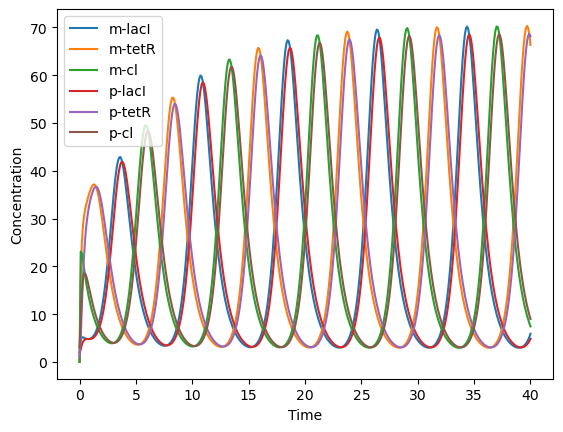

In [15]:
import pints
import pints.toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt
# Create a model
model = RepressilatorModel()

# Run a simulation
parameters = model.suggested_parameters()
print(f"suggested parameters ",model.suggested_parameters())
print(f"suggested times length ",len(model.suggested_times()))
print(f"the initial values ",model._y0)
print(f"number of outputs",model.n_outputs())
print(f"number of parameters",model.n_parameters())
times = model.suggested_times()
values = model.simulate(parameters, times)
print(f"values shape ",values.shape)

print('Parameters:')
print(parameters)

# Plot the results
plt.figure()
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.plot(times, values)
plt.legend(['m-lacI', 'm-tetR', 'm-cl', 'p-lacI', 'p-tetR', 'p-cl'])
plt.show()

## Mount to (local or google drive) and create data directory

### Google drive

In [16]:
## Google Drive
#from google.colab import drive
#drive.mount('/content/gdrive')

In [17]:
#%cd /content/gdrive/MyDrive/
#%mkdir -p SyntheticData/Repressilator
#%cd SyntheticData/Repressilator

### Local Directory

In [18]:
import os
os.makedirs("SyntheticData/Repressilator", exist_ok=True)
os.chdir("SyntheticData/Repressilator")

## Generating the Data

In [19]:
# times [0,40] into 1025 discrete value
times = np.linspace(0, 40, 1025)

# A function that takes a parameter set and times and returns the simulated values
def simulator(parameters, times):
    # randomly sample the y0 values between 0 and 100
    y = np.random.uniform(0, 100, 6)
    model = RepressilatorModel(y0=y)
    return model.simulate(parameters, times)


In [20]:
# Define the parameter ranges
alpha_0_range = (0, 5)
alpha_range = (100, 5000)
beta_range = (0, 10)
n_range = (0, 10)

# Set the number of combinations
num_combinations = 300

# Use numpy to generate the combinations with uniform distribution
alpha_0_values = np.random.uniform(alpha_0_range[0], alpha_0_range[1], num_combinations)
alpha_values = np.random.uniform(alpha_range[0], alpha_range[1], num_combinations)
beta_values = np.random.uniform(beta_range[0], beta_range[1], num_combinations)
n_values = np.random.uniform(n_range[0], n_range[1], num_combinations)

# Combine the values into a DataFrame
combinations = pd.DataFrame({
    'alpha_0': alpha_0_values,
    'alpha': alpha_values,
    'beta': beta_values,
    'n': n_values
})

# Ensure uniqueness (though with uniform random generation, collisions are highly unlikely)
combinations = combinations.drop_duplicates()

# If there are not enough unique combinations, regenerate until we have enough
while len(combinations) < num_combinations:
    additional_combinations = pd.DataFrame({
        'alpha_0': np.random.uniform(alpha_0_range[0], alpha_0_range[1], num_combinations - len(combinations)),
        'alpha': np.random.uniform(alpha_range[0], alpha_range[1], num_combinations - len(combinations)),
        'beta': np.random.uniform(beta_range[0], beta_range[1], num_combinations - len(combinations)),
        'n': np.random.uniform(n_range[0], n_range[1], num_combinations - len(combinations))
    })
    combinations = pd.concat([combinations, additional_combinations]).drop_duplicates()

# Ensure we have exactly the desired number of unique combinations
combinations = combinations.head(num_combinations)

print(combinations)

      alpha_0        alpha      beta         n
0    2.026350  2798.481080  6.232418  8.821350
1    1.791738  1851.273434  8.868288  5.879634
2    4.588208  1350.655150  0.575917  1.542883
3    3.316718  4693.529051  5.681530  3.197232
4    3.433737  3272.706206  2.219670  9.266596
..        ...          ...       ...       ...
295  1.191526  2469.802041  8.732293  8.856422
296  0.337685  3082.552240  5.687055  1.515387
297  2.993076  2102.627245  1.091445  9.293194
298  3.960628  1545.307012  6.508583  7.131021
299  2.459226  4001.755393  4.833854  7.172573

[300 rows x 4 columns]


### Generating the Training Data

In [21]:
with h5py.File('Repressilator_training.hdf5', 'w') as f:
    for i, row in combinations.head(256).iterrows():
        parameters = [row['alpha_0'], row['alpha'], row['beta'], row['n']]
        values = simulator(parameters, times)
        f.create_dataset(str(i), data=values)

### Generating Validation Data

In [22]:
with h5py.File('Repressilator_valid.hdf5', 'w') as f:
    for i, row in combinations.tail(32).iterrows():
        parameters = [row['alpha_0'], row['alpha'], row['beta'], row['n']]
        values = simulator(parameters, times)
        f.create_dataset(str(i), data=values)

In [23]:
# read the data from the file
with h5py.File('Repressilator_training.hdf5', 'r') as f:
    print(f.keys())
    data = f['0']
    data = np.array(data)
    print(data.shape)
    


<KeysViewHDF5 ['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '22', '220', '221', '222', '223', '224', '225', '226', '22